# Neutrino event classification

This mini-project's dataset is comprised of a number of small files containing images of simulated neutrino interactions in a hypothetical detector that looks an awful lot like the detectors of the NOvA experiment. For each neutrino interaction the images consist of two $100 \times 80$ pixel images that represent the $x \times z$ and $y \times z$ projections of the tracks of particles in the detector.

The data for this mini-project comes in the form of the following files:

| File | Description |
| ----------- | ----------- |
| neutrino1.h5 | The 1st HDF5 file containing event images and meta deta |
| $\vdots$ | The middle ones |
| neutrino200.h5| The 200th HDF5 file|


The images show the energy deposited by simulated neutrinos in a NOvA like detector. Some of the meta information in the hdf5 file is described below

| Label | Description |
| ----------- | ----------- |
| neutrino/nuenergy | Neutrino Energy (GeV) |
| neutrino/lepenergy | Lepton Energy (GeV) |
| neutrino/finalstate | Interaction |
| neutrino/finalstate | Final State |
 

The [PDG code](https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf) is a number which identifies the particle type (e.g electron=11, electron-neutrino=12, etc.)

The $interaction$ says what kind of interaction occured and is defined in the enumeration below.

## Machine learning tasks
1. Develop a machine learning classifier that can successfully identify $\nu_\mu$ charged-current events
2. Test your machine learning classifier and investigate how the efficiency of the classifier depends on the meta data variables shown above

### Potential extensions
1. Write a machine learning algorithm to determine the energy of the neutrino
2. Write a machine learning algorithm to determine the flavour of the neutrino
3. Write a machine learning algorithm to determine $y=$ lepton energy over neutrino energy
4. Write a machine learning algorithm to determine the number of protons or pions
5. Write a machine learning algorithm to determine the interaction mode.




In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

Charged-Current Quasi-Elastic (CCQE) scattering is a very important channel for neutrino oscillation experiments

In [2]:
import enum 
class Interaction(enum.Enum):
    kNumuQE =0           # Numu CC QE interaction                  
    kNumuRes =1           # Numu CC Resonant interaction           
    kNumuDIS = 2          # Numu CC DIS interaction                
    kNumuOther = 3        # Numu CC, other than above      
    kNueQE = 4            # Nue CC QE interaction
    kNueRes = 5           # Nue CC Resonant interaction
    kNueDIS = 6           # Nue CC DIS interaction
    kNueOther = 7         # Nue CC, other than above
    kNutauQE = 8          # Nutau CC QE interaction
    kNutauRes = 9         # Nutau CC Resonant interaction
    kNutauDIS =10         # Nutau CC DIS interaction
    kNutauOther =11       # Nutau CC, other than above
    kNuElectronElastic = 12# NC Nu On E Scattering
    kNC =13                # NC interaction
    kCosmic =14           # Cosmic ray background
    kOther =15            # Something else.  Tau?  Hopefully we don't use this
    kNIntType=16          # Number of interaction types, used like a vector size

    
class FinalState(enum.Enum):
    kNumu0tr0sh=0          # Numu CC - no track no shower
    kNumu0tr1sh=1          # Numu CC - no track  1 shower
    kNumu0tr2sh=enum.auto()          # Numu CC - no track  2 shower
    kNumu0trMsh=enum.auto()          # Numu CC - no track 3+ shower
    kNumu1tr0sh=enum.auto()          # Numu CC -  1 track no shower
    kNumu1tr1sh=enum.auto()          # Numu CC -  1 track  1 shower
    kNumu1tr2sh=enum.auto()          # Numu CC -  1 track  2 shower
    kNumu1trMsh=enum.auto()          # Numu CC -  1 track 3+ shower
    kNumu2tr0sh=enum.auto()          # Numu CC -  2 track no shower
    kNumu2tr1sh=enum.auto()          # Numu CC -  2 track  1 shower
    kNumu2tr2sh=enum.auto()          # Numu CC -  2 track  2 shower
    kNumu2trMsh=enum.auto()          # Numu CC -  2 track 3+ shower
    kNumuMtr0sh=enum.auto()          # Numu CC - 3+ track no showe
    kNumuMtr1sh=enum.auto()          # Numu CC - 3+ track  1 shower
    kNumuMtr2sh=enum.auto()          # Numu CC - 3+ track  2 showe
    kNumuMtrMsh=enum.auto()          # Numu CC - 3+ track 3+ shower
    kNue0tr0sh=enum.auto()           # Nue CC - no track no shower
    kNue0tr1sh=enum.auto()           # Nue CC - no track  1 shower
    kNue0tr2sh=enum.auto()           # Nue CC - no track  2 showe
    kNue0trMsh=enum.auto()           # Nue CC - no track 3+ shower
    kNue1tr0sh=enum.auto()           # Nue CC -  1 track no shower
    kNue1tr1sh=enum.auto()           # Nue CC -  1 track  1 shower
    kNue1tr2sh=enum.auto()           # Nue CC -  1 track  2 shower
    kNue1trMsh=enum.auto()           # Nue CC -  1 track 3+ shower
    kNue2tr0sh=enum.auto()           # Nue CC -  2 track no shower
    kNue2tr1sh=enum.auto()           # Nue CC -  2 track  1 shower
    kNue2tr2sh=enum.auto()           # Nue CC -  2 track  2 shower
    kNue2trMsh=enum.auto()           # Nue CC -  2 track 3+ shower
    kNueMtr0sh=enum.auto()           # Nue CC - 3+ track no shower
    kNueMtr1sh=enum.auto()           # Nue CC - 3+ track  1 shower
    kNueMtr2sh=enum.auto()           # Nue CC - 3+ track  2 shower
    kNueMtrMsh=enum.auto()           # Nue CC - 3+ track 3+ shower
    kNC0tr0sh=enum.auto()           # NC CC - no track no shower
    kNC0tr1sh=enum.auto()           # NC CC - no track  1 shower
    kNC0tr2sh=enum.auto()           # NC CC - no track  2 shower
    kNC0trMsh=enum.auto()           # NC CC - no track 3+ shower
    kNC1tr0sh=enum.auto()           # NC CC -  1 track no shower
    kNC1tr1sh=enum.auto()           # NC CC -  1 track  1 shower
    kNC1tr2sh=enum.auto()           # NC CC -  1 track  2 shower
    kNC1trMsh=enum.auto()           # NC CC -  1 track 3+ shower
    kNC2tr0sh=enum.auto()           # NC CC -  2 track no shower
    kNC2tr1sh=enum.auto()           # NC CC -  2 track  1 shower
    kNC2tr2sh=enum.auto()           # NC CC -  2 track  2 shower
    kNC2trMsh=enum.auto()           # NC CC -  2 track 3+ shower
    kNCMtr0sh=enum.auto()           # NC CC - 3+ track no shower
    kNCMtr1sh=enum.auto()           # NC CC - 3+ track  1 shower
    kNCMtr2sh=enum.auto()           # NC CC - 3+ track  2 shower
    kNCMtrMsh=enum.auto()           # NC CC - 3+ track 3+ shower
    kCosmicFS=enum.auto()           # Cosmic ray background
    kOtherFS=enum.auto()            # Something else.  Tau?  Hopefully we don't use this
    kNFStType=enum.auto()            # Number of interaction types, used like a vector size



In [3]:
# import the urllib library
import urllib.request
 
# Copy a network object to a local file
urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino1.h5', "neutrino1.h5")

#Open the local h5 file with h5py
df=h5py.File('neutrino1.h5','r')


In [459]:
#Print the keys in the neutrino meta data
print(df.keys())
print(df['neutrino'].keys())

#Get an numpy array containing the event image, and reshape it from flat to 2x100x80
print(np.shape(df['cvnmap']))
print(df['neutrino']['evt'])
event0=np.array(df['cvnmap'][0]).reshape((2,100,80))

<KeysViewHDF5 ['cvnmap', 'neutrino']>
<KeysViewHDF5 ['cycle', 'evt', 'finalstate', 'finalstateprong', 'interaction', 'lepenergy', 'nuenergy', 'parent', 'particles', 'rec.training.trainingdata_idx', 'run', 'subevt', 'subrun', 'vtxx', 'vtxy', 'vtxz']>
(7001, 16000)
<HDF5 dataset "evt": shape (7001, 1), type "<u4">


Text(0.5, 1.0, 'Y-view')

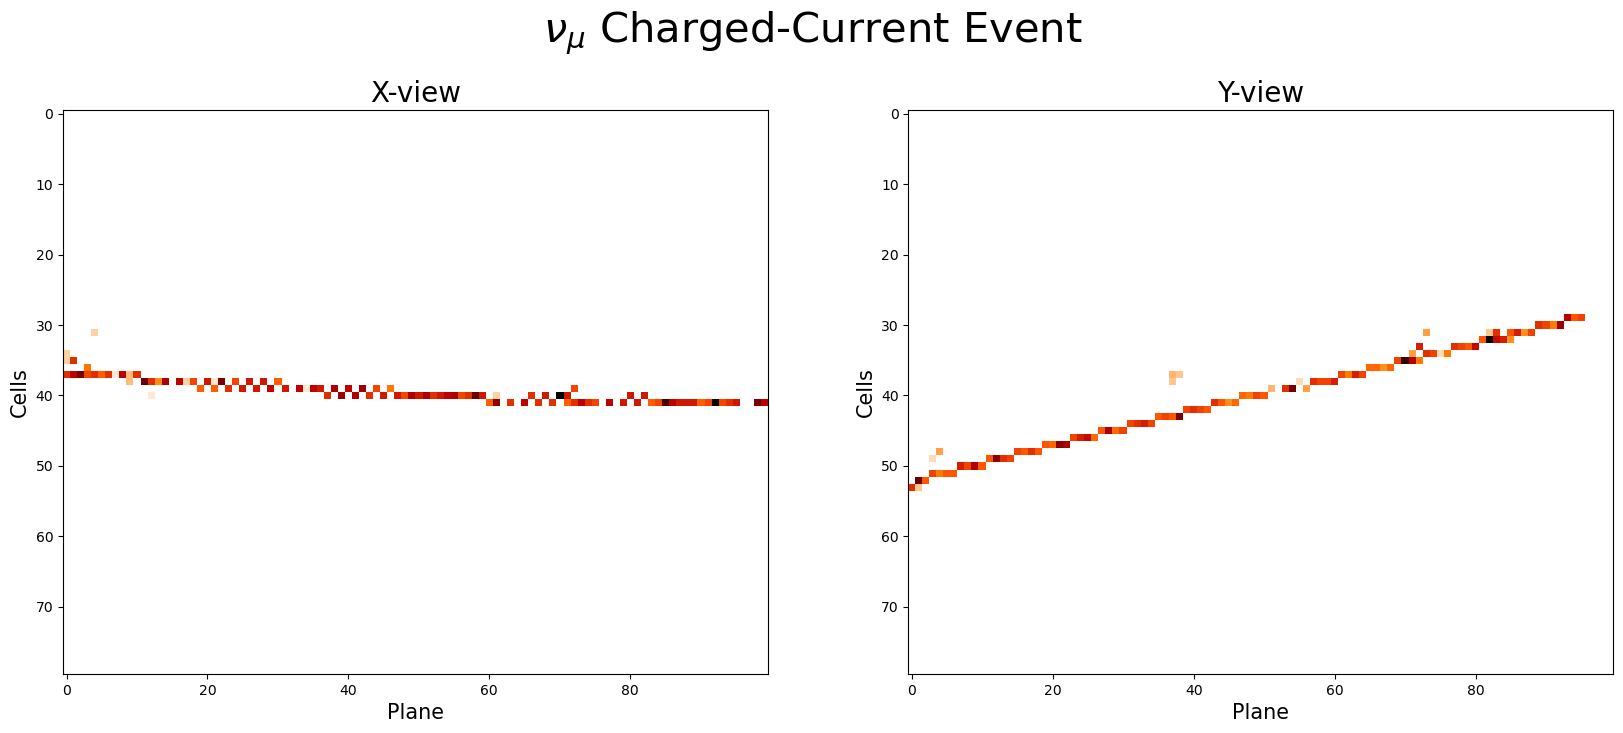

In [520]:
#Plot the first event, look it is a nice long muon track

fig,[ax1,ax2]=plt.subplots(ncols=2,figsize=(20, 8), dpi=100)
fig.suptitle(r'$\nu_\mu$ Charged-Current Event', fontsize=30)
ax1.imshow(event0[0].T,cmap='gist_heat_r')
ax1.set_xlabel('Plane', fontsize=15)
ax1.set_ylabel('Cells', fontsize=15)
ax1.set_title('X-view', fontsize=20)

ax2.imshow(event0[1].T,cmap='gist_heat_r')
ax2.set_xlabel('Plane', fontsize=15)
ax2.set_ylabel('Cells', fontsize=15)
ax2.set_title('Y-view', fontsize=20)

(array([3358., 1891., 1013.,  394.,  184.,   85.,   44.,   14.,    8.,
          10.]),
 array([ 0.      ,  8.229538, 16.459076, 24.688614, 32.91815 , 41.14769 ,
        49.377228, 57.606766, 65.8363  , 74.06584 , 82.29538 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

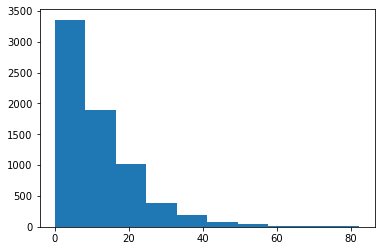

In [8]:
fs=np.array(df['neutrino']['finalstate'])
nuenergy=np.array(df['neutrino']['nuenergy'])
fig, ax = plt.subplots()
ax.hist(nuenergy)

# Importing more data from h5 files

In order to train a network to optimal performance, the 7000 images contained in a single file, were found to be not enough. Therefore we are going to load data from 4 randomly chosen files, for a total of $\sim 28,000$ pairs of images.

In [10]:
import random

all_files=[]
for i in range(4):                # loop trough 10 files
    i+=1        # randomly pick 10 files out of the 200 available ones
    
    # url address of the file
    address=f'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino{i}.h5'
    # name of the file
    f_name=f"neutrino{i}.h5"
    
    urllib.request.urlretrieve(address, f_name)

    #Open the local h5 file with h5py
    all_files.append(h5py.File(f_name,'r'))

Now we need to join all the images from the 4 files in a single numpy array, so that we can normalise them by setting the values of the pixels to be in the range $[0,1]$ instead of $[0,255]$.

In [139]:
# join all images in a single array, and normalise them by setting pixel values to be in the range [0,1]
all_images=np.concatenate(([np.array(all_files[i]['cvnmap']) for i in range(len(all_files))]),axis=0)/255

# creating an arrays containing the metavariables associated with every single interaction
all_interaction=np.concatenate(([np.array(all_files[i]['neutrino']['interaction']) for i in range(len(all_files))]),axis=0)
all_nuenergy=np.concatenate(([np.array(all_files[i]['neutrino']['nuenergy']) for i in range(len(all_files))]),axis=0)
all_lepenergy=np.concatenate(([np.array(all_files[i]['neutrino']['lepenergy']) for i in range(len(all_files))]),axis=0)
all_finalstate=np.concatenate(([np.array(all_files[i]['neutrino']['finalstate']) for i in range(len(all_files))]),axis=0)


# 1. Develop a machine learning classifier that can successfully identify $\nu_\mu$ charged-current events

Let's start by importing keras and tensorflow libraries

In [12]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

Now we need to define the labels to train and test our binary classification model. The labels are defined as:

$$1 \rightarrow \nu_{\mu} CC \: event$$
$$0 \rightarrow  \: other \: event$$


In [13]:
is_Numu=[]  # define array for binary labels

for state in all_interaction:
    if state < 4:          # Numu charged-current events
        is_Numu.append(1)
    else:                  # other events
        is_Numu.append(0)

Now let us determine how many events belong to class 1, i.e. $\nu_{\mu}$ CC events.

In [521]:
count=0               # initialise the count
for i in is_Numu:     
    if i==1:          # counting the number of Numu CC events
        count+=1
        
print(f'{count}/{len(is_Numu)} interactions are Numu CC events, which represent {count/len(is_Numu)*100:0.2f}% of the dataset')

24459/27830 interactions are Numu CC events, which represent 87.89% of the dataset


Now we need to normalise our images by setting the values of the pixels to be in the range $[0,1]$ instead of $[0,255]$.

We will also split the dataset into training and testing images. The training images will be $\sim 80\%$ and the testing images will be the remaining $\sim 20\%$.

In [526]:
index_80pct=int(len(all_images)*0.8)          # index representing the 80% separation between train and test data

train_images=all_images[:index_80pct]         # normalised training images 
test_images=all_images[index_80pct:]          # normalised test images

train_labels=np.array(is_Numu[:index_80pct])  # training binary labels
test_labels=np.array(is_Numu[index_80pct:])   # testing binary labels

### Building the convolutional neural network (CNN) classifier

Now we will build a binary classification model using a CNN having 2 main branches. The first branch will be responsible for processing the X-view image of the simulated interaction, and the second will be responsible for processing of the Y-view image.

Each branch consists in:

- Input layer with shape (100,80), which corresponds to the shape of the image
- 2D convolutional layer with 32 filters and a kernel of size (3,3), and ReLU activation
- 2D Max pooling layer with pool size (2,2)
- 2D convolutional layer with 32 filters and a kernel of size (3,3), and ReLU activation
- 2D Max pooling layer with pool size (2,2)

The 2 branches will then merge and their combined output will be processed by the following layers:

- 2D convolutional layer with 32 filters and a kernel of size (5,5), and ReLU activation
- 2D Max pooling layer with pool size (2,2)
- Flatten Layer
- Dense layer with 200 neurons, and ReLU activation
- Dense output layer with 1 neuron, and Sigmoid activation

In [214]:
# Input Layers, one for each branch of the model
xz_input = keras.Input(shape=(100,80,1), name="x projection")  # X-view branch
yz_input = keras.Input(shape=(100,80,1), name="y projection")  # Y-view branch

# X-view branch, convolutional and max pooling layers
xz_First_Conv2D = keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 80,1)) (xz_input)
xz_First_MaxPool = keras.layers.MaxPooling2D((2, 2)) (xz_First_Conv2D)
xz_Second_Conv2D = keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 80,1)) (xz_First_MaxPool)
xz_Second_MaxPool = keras.layers.MaxPooling2D((2, 2)) (xz_Second_Conv2D)

# Y-view branch, convolutional and max pooling layers
yz_First_Conv2D = keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 80,1)) (yz_input)
yz_First_MaxPool = keras.layers.MaxPooling2D((2, 2)) (yz_First_Conv2D)
yz_Second_Conv2D = keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 80,1)) (yz_First_MaxPool)
yz_Second_MaxPool = keras.layers.MaxPooling2D((2, 2)) (yz_Second_Conv2D)

# Merge branches into a large vector via concatenation
merged = keras.layers.concatenate([xz_Second_MaxPool,yz_Second_MaxPool], axis=1)

# Final convolution of combined output
merged_Conv2D = keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(100, 80,1)) (merged)
merged_MaxPool=keras.layers.MaxPooling2D((2, 2)) (merged_Conv2D)

flatten = keras.layers.Flatten()(merged_MaxPool)               # Flattening layer
Dense = keras.layers.Dense(200, activation='relu')(flatten)    # Dense layer
out = keras.layers.Dense(1, activation='sigmoid')(Dense)       # Final Output layer

# Create the model with the given input, output and hidden layers
model = keras.Model(
    inputs=[xz_input, yz_input],
    outputs=[out],
)
 
# Generate model summary
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x projection (InputLayer)      [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 y projection (InputLayer)      [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 98, 78, 32)   320         ['x projection[0][0]']           
                                                                                           

The overall number of parameters in the model are 985,969.

Now we need to reshape the images so that we can feed them to our model. Originally the images corresponding to every single event are given as a single 1D array of length $16000$, we need to reshape this array into 2 separate $100 \times 800$ pixels images: the $x \times z$ and $y \times z$ projections of the tracks of particles in the detector.

In [527]:
# reshaping every pair of images in the dataset from (16000)--->(100,80,1)
xz_images=train_images.reshape(len(train_images),2,100,80)[:,0]            # X-view train images
yz_images=train_images.reshape(len(train_images),2,100,80)[:,1]            # Y-view train images

xz_images_target=test_images.reshape(len(test_images),2,100,80)[:,0]       # X-view test images
yz_images_target=test_images.reshape(len(test_images),2,100,80)[:,1]       # Y-view test images

The chosen optimizer is adam, the loss function is binary crossentropy and the metrics are accuracy of the model and the number of true negatives. The true negatives metric was introduced as the major issue encountered when training various model with different structures was the fact that these models tended to predict always the majority class on which they were trained.  

In this case the majority class is 1, which represents charged current $\nu_\mu$ events, and is $\sim88\%$ of the original dataset. Models predicting always values of 1, no matter which input image is given, can easily achieve  an accuracy $\sim88\%$, however they are completely useless for neutrino classification purposes. The true negatives metric helps identifying models which always predict 1, as in that case the number of true negatives is always 0.

Now we will train our model for 20 epochs and a batch size of 30 images

In [216]:
# compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.TrueNegatives()])

# training the model for 20 epochs, 400 steps, on a batch size of 30 images.
history = model.fit([xz_images,yz_images], train_labels, epochs=20, batch_size=30,steps_per_epoch=400,
                    validation_data=([xz_images_target,yz_images_target],test_labels))

Epoch 1/20
400/400 [==============================] - 93s 230ms/step - loss: 0.3398 - accuracy: 0.8796 - true_negatives_22: 1.0000 - val_loss: 0.2955 - val_accuracy: 0.8814 - val_true_negatives_22: 0.0000e+00
Epoch 2/20
400/400 [==============================] - 89s 223ms/step - loss: 0.2920 - accuracy: 0.8766 - true_negatives_22: 3.0000 - val_loss: 0.2710 - val_accuracy: 0.8814 - val_true_negatives_22: 0.0000e+00
Epoch 3/20
400/400 [==============================] - 89s 222ms/step - loss: 0.2635 - accuracy: 0.8815 - true_negatives_22: 27.0000 - val_loss: 0.2627 - val_accuracy: 0.8812 - val_true_negatives_22: 29.0000
Epoch 4/20
400/400 [==============================] - 89s 223ms/step - loss: 0.2653 - accuracy: 0.8756 - true_negatives_22: 35.0000 - val_loss: 0.2524 - val_accuracy: 0.8803 - val_true_negatives_22: 14.0000
Epoch 5/20
400/400 [==============================] - 89s 223ms/step - loss: 0.2505 - accuracy: 0.8825 - true_negatives_22: 91.0000 - val_loss: 0.2490 - val_accuracy: 0

In the NOvA experiment scientists aim at identifying whether muon neutrinos change their flavour while travelling from the Fermilab detector to the Minnesota detector, and if so, what percentage of them have undergone this transformation. 

For this reason it is equally important to correctly identify muon neutrinos from $\nu_{\mu}$ CC events and neutrinos of different flavours from other CC events. Therefore it is believed that the optimal classification model for this scenario should achieve an equal accuracy in the identification of both the considered classes.

In order to do so the probability threshold value was adjusted, a posteriori, to 0.93, meaning that events with a predicted score > 0.93 are classified as 1, otherwise as 0. 

In the following cell this threshold value is used to obtain the final predictions of the model on the testing dataset.

In [529]:
# Generating model predictions for the test dataset
predictions=model.predict([xz_images_target,yz_images_target])

# Turning predicted probability values into class labels
# if predicted probability > 0.93 ---> label = 1
# if predicted probability <= 0.93 --> label = 0
classes=(predictions[:]>0.93).astype(int) 

# counting the number of correct predictions
count=0                                        #initialise overall count
for val in [0,1]:                              #loop through class labels
    count_tot_val,count_correct_val=0,0        #initialise count for the considered class
    for i in range(len(classes)):
        if test_labels[i]==val:
            count_tot_val+=1
            if classes[i]==test_labels[i]:
                count+=1
                count_correct_val+=1 
                

    print(f'Precision for interaction={val} : {count_correct_val}/{count_tot_val} \t {count_correct_val/count_tot_val:0.2f}')
        
print('Overall precision :',count/len(classes))

Precision for interaction=0 : 527/660 	 0.80
Precision for interaction=1 : 3991/4906 	 0.81
Overall precision : 0.8117139777218828


This threshold value yields an accuracy of 80% in the identification of true negatives (non $\nu_{\mu}$ CC events) and an accuracy of 81% in identification of true positives ($\nu_{\mu}$ CC events), summing up to an overall accuracy of 81%.

We can now plot the accuracy and the number of true negatives for both the training and testing datasets.

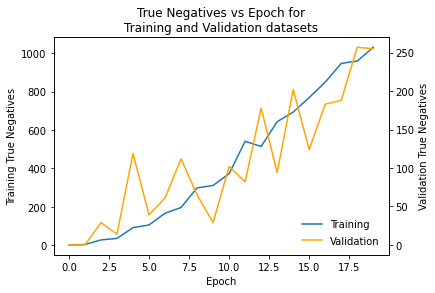

In [237]:
# Plotting instructions for True negatives vs Epochs
plt.plot(history.history['true_negatives_22'], label='Training')
plt.xlabel('Epoch')
plt.ylabel('Training True Negatives')
plt.legend(loc=(0.73,0.1),frameon=False)
plt.twinx()
plt.plot(history.history['val_true_negatives_22'], label = 'Validation',color='orange')
plt.ylabel('Validation True Negatives')
plt.legend(loc='lower right',frameon=False)
plt.title('True Negatives vs Epoch for\nTraining and Validation datasets')
plt.savefig('True negatives',dpi=200)

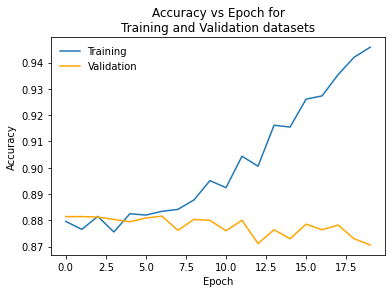

In [242]:
# Plotting instructions for Accuracy vs Epochs
plt.plot(history.history['accuracy'], label='Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=(0.73,0.1),frameon=False)
plt.plot(history.history['val_accuracy'], label = 'Validation',color='orange')
plt.legend(loc='best',frameon=False)
plt.title('Accuracy vs Epoch for\nTraining and Validation datasets')
plt.savefig('Accuracy',dpi=200)

A complete analysis of these plots can be found in the project report at page 11.

# 2. Test your machine learning classifier and investigate how the efficiency of the classifier depends on the meta data variables shown above

Now we will test the dependence of the model accuracy on the following meta-variables:

- Energy of the neutrino in the interaction
- Energy of the lepton in the interaction
- Type of neutrino interaction

## Neutrino Energy

We will start by considering the energy of the neutrinos in the classified interactions.

Firstly we will defined a function which takes as input the neutrino energies associated with each interaction and the number of equally distributed batches/divisions. The function then splits the interactions in a given number of batches depending on their associated neutrino energy and returns the overall precision of the model for each of the equally distributed batches. 

In [297]:
def energy_dependence(some_energies,energy_divisions):
    ''' Splits the neutrino interactions into a given number og eqaullly distributed batches, 
    depending on the associate energy (either of the neutrino or of the lepton)
    
    Input:
    some_energies: array of energies associated with each interaction
    energy_divisions: number of equally distributed batches
    
    Output:
    overall_precision: array holding the model accuracy for each batch
    mean_energies: array holding the mean enegies of each batch
    '''
    
    # consider energies corresponding to the interactions in the test dataset 
    energies=np.array(np.concatenate(np.array(some_energies[index_80pct:]))) 
    energy_ordered=np.argsort(energies) # get indeces of the interactions in ascending energy order

    overall_precision=[]  # initialise precision array
    mean_energies = []    # initialise array holding values of the mean energy of each batch
    for i in range(energy_divisions):  # loop through every batch
        # get indeces corresponding to interactions is the batch
        indeces=energy_ordered[int(i/energy_divisions*len(energy_ordered)):int((i+1)/energy_divisions*len(energy_ordered))]
        print(f'Energies from {min(energies[indeces]):0.2f} GeV to {max(energies[indeces]):0.2f} GeV')
        
        # calculate mean energy of the batch
        mean_energies.append(np.mean(energies[indeces]))
        
        #define images and labels of the batch
        target_energy_images=[xz_images_target[indeces],yz_images_target[indeces]]
        target_energy_labels=test_labels[indeces]

        # make predictions on the batch
        predictions=model.predict(target_energy_images)
        classes=(predictions>0.93).astype(int)

        # calculate model accuracy over a specific energy range
        count,count_tot1,count_tot0,count_correct1,count_correct0=0,0,0,0,0
        for i in range(len(classes)):
            if classes[i]==target_energy_labels[i]:
                    count+=1

        print(f'Overall precision : {count/len(classes):0.2f}')
        overall_precision.append(count/len(classes))
        print()    
        
    return overall_precision, mean_energies

We will now use the function to print the energy range of each batch, and the model accuracy over that range.

In [292]:
overall_precision, mean_energies=energy_dependence(all_nuenergy,50)

Energies from 0.00 GeV to 1.10 GeV
Overall precision : 0.78

Energies from 1.10 GeV to 1.44 GeV
Overall precision : 0.70

Energies from 1.44 GeV to 1.60 GeV
Overall precision : 0.77

Energies from 1.60 GeV to 1.71 GeV
Overall precision : 0.73

Energies from 1.71 GeV to 1.80 GeV
Overall precision : 0.75

Energies from 1.80 GeV to 1.90 GeV
Overall precision : 0.77

Energies from 1.90 GeV to 1.99 GeV
Overall precision : 0.78

Energies from 1.99 GeV to 2.07 GeV
Overall precision : 0.85

Energies from 2.07 GeV to 2.16 GeV
Overall precision : 0.85

Energies from 2.16 GeV to 2.24 GeV
Overall precision : 0.79

Energies from 2.24 GeV to 2.31 GeV
Overall precision : 0.77

Energies from 2.31 GeV to 2.42 GeV
Overall precision : 0.80

Energies from 2.42 GeV to 2.51 GeV
Overall precision : 0.80

Energies from 2.52 GeV to 2.61 GeV
Overall precision : 0.81

Energies from 2.61 GeV to 2.79 GeV
Overall precision : 0.86

Energies from 2.79 GeV to 3.01 GeV
Overall precision : 0.88

Energies from 3.01 GeV t

Let us now plot the neutrino energy distribution and the accuracy of the model as the considered energy range (of the batch) changes. Note that the x-coordinate of each data point corresponds to the mean energy of the batch.

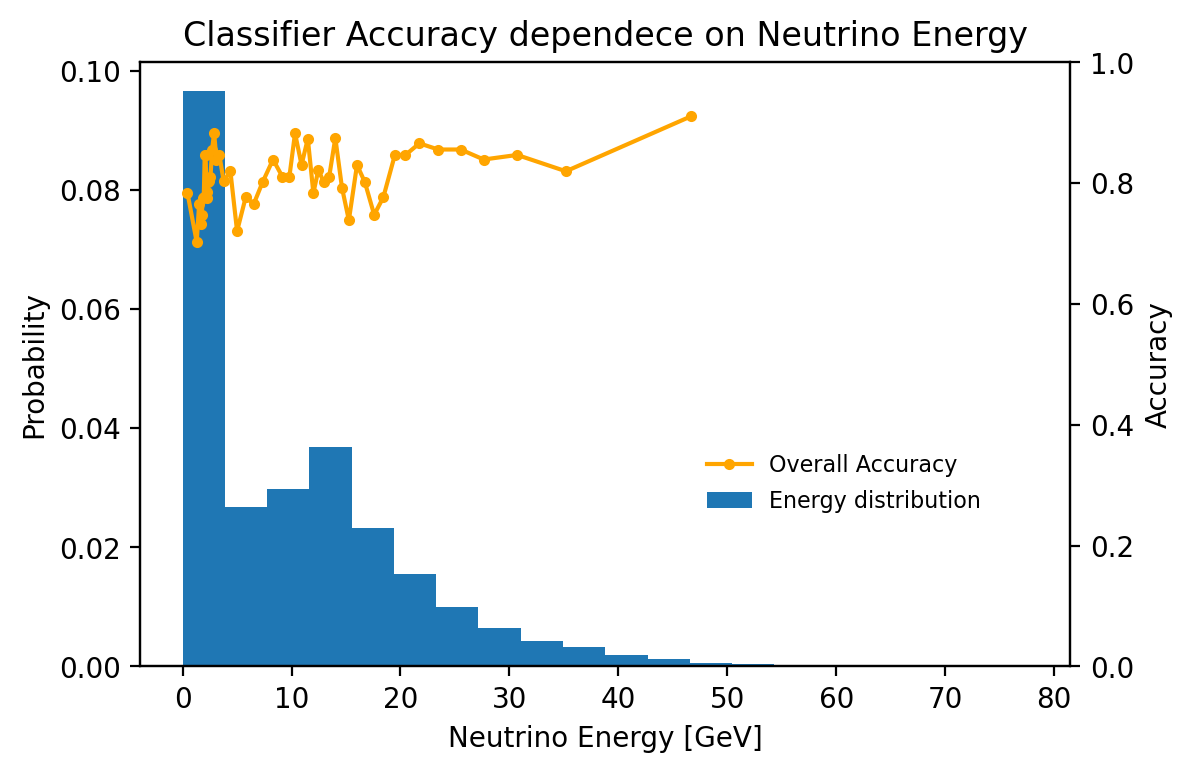

In [293]:
# plotting instructions for  neutrino energy distribution and classifier accuracy vs neutrino energy
plt.figure(dpi=200)
plt.hist(np.array(energies),density=True,bins=20,label='Energy distribution')
plt.legend(loc=(0.6,0.24),fontsize=8,frameon=False)
plt.xlabel('Neutrino Energy [GeV]')
plt.ylabel('Probability')
plt.twinx()
plt.ylabel('Accuracy')
plt.plot(mean_energies,overall_precision,'.-',color='orange',label='Overall Accuracy')

plt.ylim(0,1)
plt.legend(loc=(0.6,0.3),fontsize=8,frameon=False)
plt.title('Classifier Accuracy dependece on Neutrino Energy')
plt.savefig('nuenergy')

As it can be seen more interaction are found at low neutrino energy, and since the batches are equally distributed, more data points are found in the low energy region. A detailed analysis of this plot can be found in the project report at page 12.
 
## Lepton energy

We will now consider the energy of the leptons in the classified interactions.

As above we will now use the defined function to divide the interaction in equally distributed batches, print the energy range of each batch, and the model accuracy over that range.

In [338]:
overall_precision, mean_energies= energy_dependence(all_lepenergy,50)

Energies from 0.00 GeV to 0.23 GeV
Overall precision : 0.63

Energies from 0.23 GeV to 0.39 GeV
Overall precision : 0.37

Energies from 0.39 GeV to 0.51 GeV
Overall precision : 0.43

Energies from 0.52 GeV to 0.63 GeV
Overall precision : 0.53

Energies from 0.63 GeV to 0.71 GeV
Overall precision : 0.58

Energies from 0.71 GeV to 0.81 GeV
Overall precision : 0.61

Energies from 0.81 GeV to 0.92 GeV
Overall precision : 0.79

Energies from 0.92 GeV to 1.02 GeV
Overall precision : 0.73

Energies from 1.02 GeV to 1.10 GeV
Overall precision : 0.79

Energies from 1.10 GeV to 1.17 GeV
Overall precision : 0.74

Energies from 1.18 GeV to 1.25 GeV
Overall precision : 0.83

Energies from 1.25 GeV to 1.33 GeV
Overall precision : 0.75

Energies from 1.33 GeV to 1.42 GeV
Overall precision : 0.80

Energies from 1.42 GeV to 1.51 GeV
Overall precision : 0.83

Energies from 1.51 GeV to 1.59 GeV
Overall precision : 0.90

Energies from 1.59 GeV to 1.68 GeV
Overall precision : 0.91

Energies from 1.68 GeV t

Let us now plot the lepton energy distribution and the accuracy of the model as the considered energy range (of the batch) changes. Note that the x-coordinate of each data point corresponds to the mean energy of the batch.

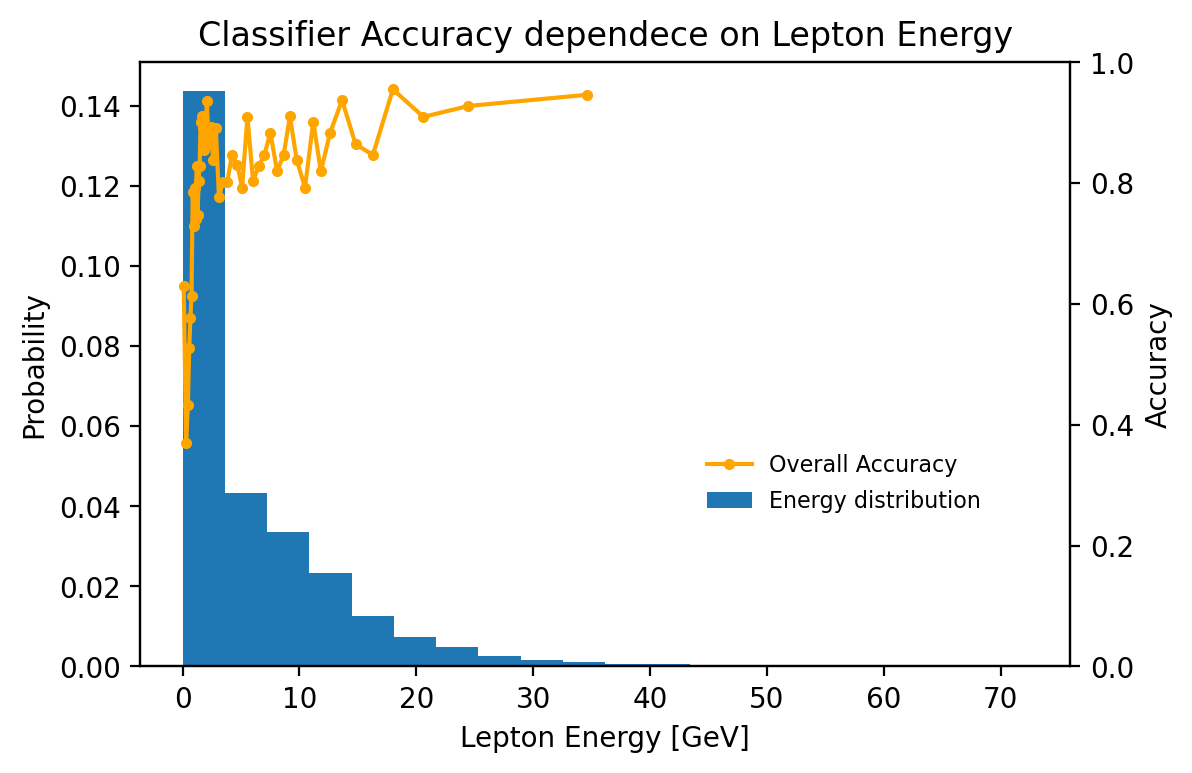

In [299]:
# plotting instructions for lepton energy distribution and classifier accuracy vs lepton energy
plt.figure(dpi=200)
plt.hist(np.array(all_lepenergy),density=True,bins=20,label='Energy distribution')
plt.legend(loc=(0.6,0.24),fontsize=8,frameon=False)
plt.xlabel('Lepton Energy [GeV]')
plt.ylabel('Probability')
plt.twinx()
plt.ylabel('Accuracy')
plt.plot(mean_energies,overall_precision,'.-',color='orange',label='Overall Accuracy')

plt.ylim(0,1)
plt.legend(loc=(0.6,0.3),fontsize=8,frameon=False)
plt.title('Classifier Accuracy dependece on Lepton Energy')
plt.savefig('lepenergy')

Also in this case the energy distribution follows and exponential probability distribution. Therefore more interactions are found at low neutrino energy, and since the batches are equally distributed, more data points are found in the low energy region. A detailed analysis of this plot can be found in the project report at page 13.

# Interaction

Finally we will consider how the model accuracy depends on the type of neutrino interaction. Firstly we will assign new labels to the simulated neutrino interactions depending on their interaction type:

In [530]:
# CC QE interaction                                 0,4,8----new label---> 0
# CC Resonant interaction                           1,5,9----new label---> 1
# CC DIS interaction                                2,6,10---new label---> 2
# CC, other than above                              3,7,11---new lsbel---> 3
# NC interaction                                    12,13----new label---> 4
# Something else                                    14,15----new label---> 5

interaction_mode=[] # initilise interaction type labels array 

for state in all_interaction: 
    if state == 0 or state==4 or state==8:
            interaction_mode.append(0)
    if state == 1 or state==5 or state==9:
            interaction_mode.append(1)
    if state == 2 or state==6 or state==10:
            interaction_mode.append(2)
    if state == 3 or state==7 or state==11:
            interaction_mode.append(3)
    if state == 12 or state==13:
            interaction_mode.append(4)
    if state == 14 or state==15:
            interaction_mode.append(5)

Finally we will evaluate separate the interactions depending on their type and evaluate the model accuracy on each different interaction type.

In [532]:
overall_precision=[]                         # initialise model precision array
for inter in np.unique(interaction_mode):    # looping through each interaction type
    # initalise array of indeces of interactions corresponding to a specific type
    indeces=[]                               
    for index, value in enumerate(interaction_mode[index_80pct:]):
        if value==inter:
            indeces.append(index)
            
    print(f'Interaction type = {inter}')
    print(f'Number of images={len(indeces)}')
    
    #define images and labels of a specific interaction type   
    target_energy_images=[xz_images_target[indeces],yz_images_target[indeces]]
    target_energy_labels=test_labels[indeces]

    # make predictions for the specific interaction type
    predictions=model.predict(target_energy_images)
    classes=(predictions>0.93).astype(int)

    count=0
    for i in range(len(classes)):
        if classes[i]==target_energy_labels[i]:
                count+=1

    print(f'Overall precision : {count/len(classes):0.2f}')
    overall_precision.append(count/len(classes))
    print()   

Interaction type = 0
Number of images=750
Overall precision : 0.91

Interaction type = 1
Number of images=1026
Overall precision : 0.83

Interaction type = 2
Number of images=3051
Overall precision : 0.78

Interaction type = 3
Number of images=138
Overall precision : 0.90

Interaction type = 4
Number of images=549
Overall precision : 0.80

Interaction type = 5
Number of images=52
Overall precision : 0.92



Conclusions and references can be found in the project report.